# ***Set Parameters to define model etc***

In [ ]:
# AF = 4

# Glx_GT = np.zeros((22,22,21,8))

# for i in range(0,8):
#     Glx_GT[...,i] = nib.load(f'Glx_amp_map_{i}.nii').get_fdata()
    
# np.save(f'Glx_Concentration_AF{AF}.npy',Glx_GT)

# Water_GT = np.zeros((22,22,21,8))

# for i in range(0,8):
#     Water_GT[...,i] = nib.load(f'water_amp_map_{i}.nii').get_fdata()
    
# np.save(f'Water_Concentration_AF{AF}.npy',Water_GT)

# Glc_GT = np.zeros((22,22,21,8))

# for i in range(0,8):
#     Glc_GT[...,i] = nib.load(f'Glc_amp_map_{i}.nii').get_fdata()
    
# np.save(f'Glc_Concentration_AF{AF}.npy',Glc_GT)

In [2]:
Test = nib.load(f'SpecMap_water.nii.gz').get_fdata()

ground_truth            = np.load('FIT_GT.npy')

NameError: name 'nib' is not defined

In [ ]:
np.max(Test)

In [ ]:
x,y,z = 10, 10, 10

Slice = Test[x,y,z,:]

Slice_2 = ground_truth[x,y,z,:,0]

plt.plot(Slice)

#plt.plot(Slice_2)

In [ ]:
# FIT = np.zeros((22,22,21,162,8))

# for i in range(0,8):
#     FIT[...,i] = nib.load(f'SpecMap_LCMFit_{i}.nii.gz').get_fdata()
    
# np.save(f'FIT_AF4.npy',FIT)

# Before_FIT = np.zeros((22,22,21,162,8))

# for i in range(0,8):
#     Before_FIT[...,i] = nib.load(f'SpecMap_LCMInput_{i}.nii.gz').get_fdata()
    
# np.save(f'AF4.npy',Before_FIT)

In [1]:
import os
import sys

sys.path.append('../../scripts')
sys.path.append('../../models')

os.environ["CUDA_VISIBLE_DEVICES"]= '0' #, this way I would choose GPU 3 to do the work

import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom # for compressing images / only for testing purposes to speed up NN training
from torch.utils.data import DataLoader, Subset
import torch.optim as optim
import torch.nn as nn
from data_preparation import *
from data_undersampling import *
from output_statistics import *
from data_augmentation import *

from interlacer_layer_modified import *
from Residual_Interlacer_modified import *
from skimage.metrics import structural_similarity as ssim 

#### Model import correct model
from Unet import * #from Naive_CNN_3D_Residual_No_Batch_Norm import *
import nibabel as nib

grouped_time_steps = 1 # Set how many subsequent time steps you want to give to the network at once. Values allowed: 1, 2, 4, 8 (because it has to divide 8)

In [ ]:
#out_data, out_labels, out_mask = transform_6d_data_labels_mask(Ground_Truth, Ground_Truth, mask_extended)

In [2]:
Model_Outputs_Test_Set = np.fft.ifft(np.fft.ifftshift(np.load('FIT_AF2.npy'), axes=-2), axis=-2)
model_input             = np.fft.ifft(np.fft.ifftshift(np.load('FIT_AF4.npy'), axes=-2), axis=-2)
ground_truth            = np.fft.ifft(np.fft.ifftshift(np.load('FIT_GT.npy'), axes=-2), axis=-2)

In [ ]:
#Model_Outputs_Test_Set = np.load('FIT_AF2.npy')

In [ ]:
# Slice = Model_Outputs_Test_Set[10,10,10,:,7]

# plt.plot(Slice)

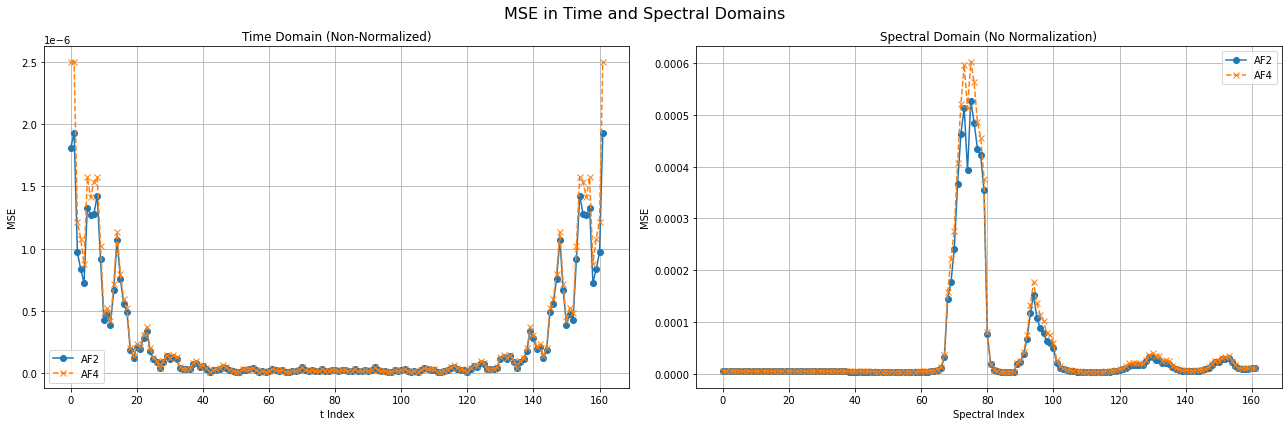

==== Model Output vs Ground Truth ====
Total MSE in image domain: 1.2521559842969396e-07
Normalized Total MSE in image domain: 1.2521559842969396e-07
Total MSE in spectral domain: 2.0284926945610334e-05

==== Model Input vs Ground Truth ====
Total MSE in image domain: 1.4456877367512766e-07
Normalized Total MSE in image domain: 1.4456877367512766e-07
Total MSE in spectral domain: 2.3420141335370568e-05


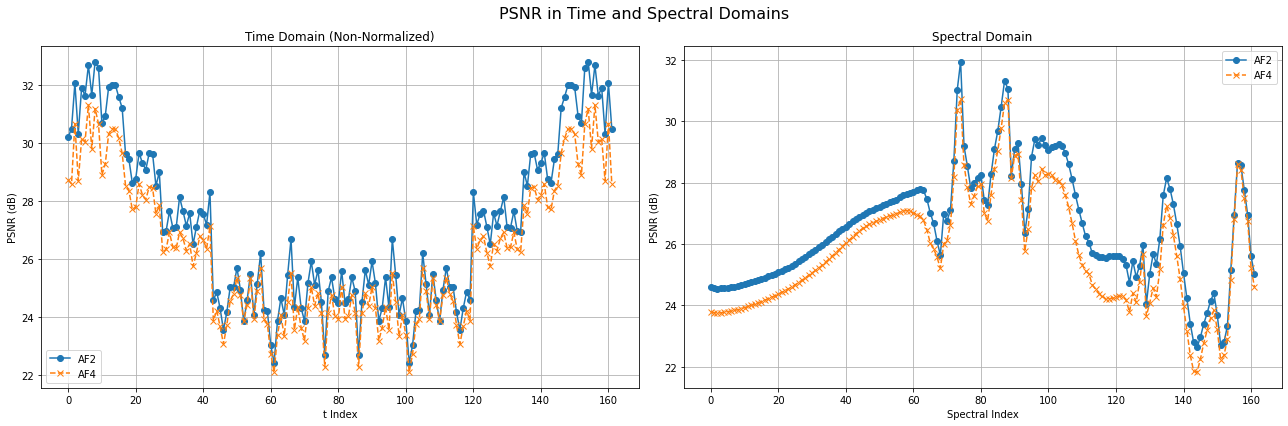

==== Model Output vs. Ground Truth ====
Average PSNR in image domain:    27.19728005994562
Average PSNR in frequency domain: 26.507882216091026

==== Model Input vs. Ground Truth ====
Average PSNR in image domain:    26.30591666136305
Average PSNR in frequency domain: 25.765247756394498


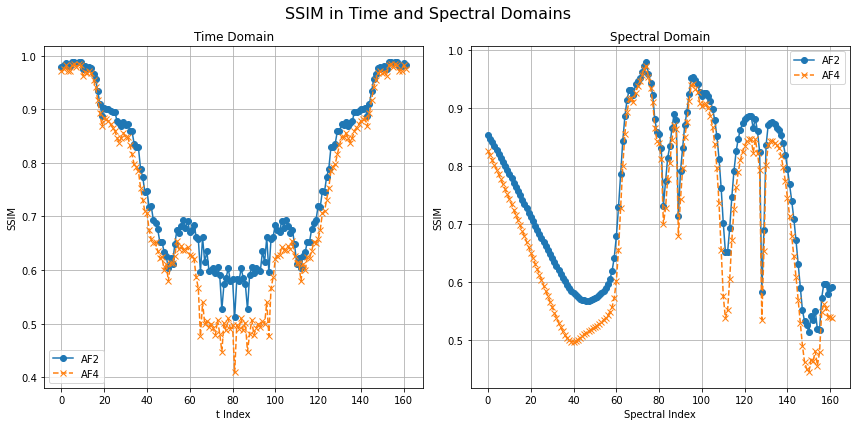

==== Model Output vs. Ground Truth ====
Average SSIM in image domain:    0.7727041009128589
Average SSIM in frequency domain: 0.7524632642793486

==== Model Input vs. Ground Truth ====
Average SSIM in image domain:    0.7298061295902429
Average SSIM in frequency domain: 0.7045082641761955


In [3]:
trancuate_t = 162

norm_values_test = np.ones((trancuate_t,8))

# # #### NORMALIZE!
# model_input = model_input/np.mean(np.max(np.abs(model_input), axis=(0,1,2)))   
# Model_Outputs_Test_Set = Model_Outputs_Test_Set/np.mean(np.max(np.abs(Model_Outputs_Test_Set), axis=(0,1,2)))   
# ground_truth = ground_truth/np.mean(np.max(np.abs(ground_truth), axis=(0,1,2))) 
# # #### NORMALIZE END!

plot_general_statistics(Model_Outputs_Test_Set, model_input, ground_truth, trancuate_t, norm_values_test, label = "AF2", label2 = "AF4")
plot_general_statistics_PSNR(Model_Outputs_Test_Set, model_input, ground_truth, trancuate_t, norm_values_test, label = "AF2", label2 = "AF4")
plot_general_statistics_SSIM(Model_Outputs_Test_Set, model_input, ground_truth, trancuate_t, norm_values_test, label = "AF2", label2 = "AF4")

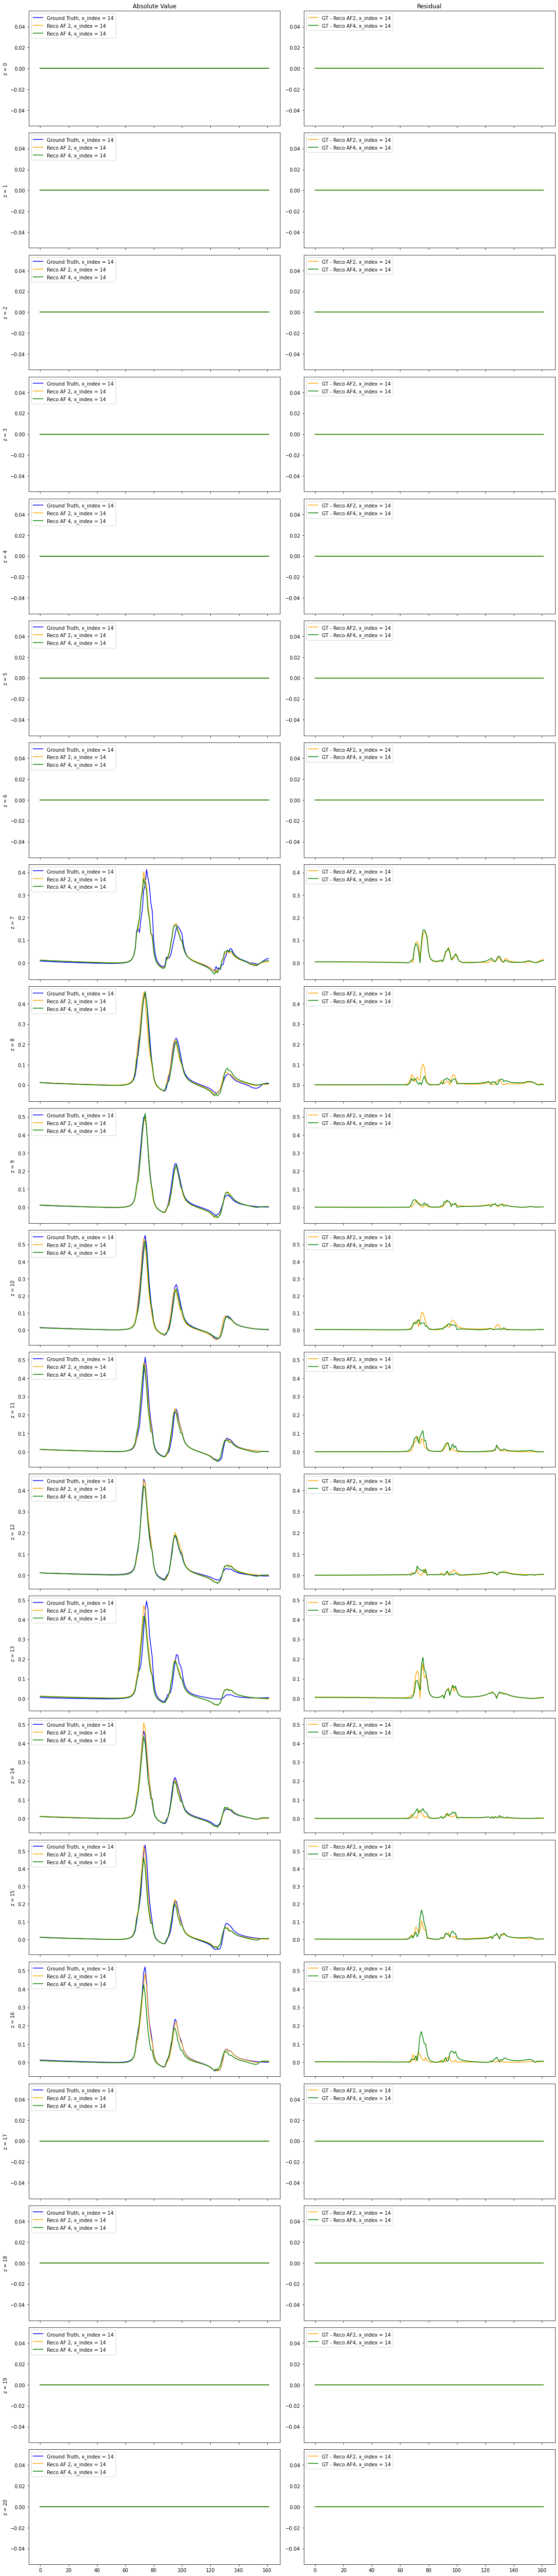

===================Next x index===========================


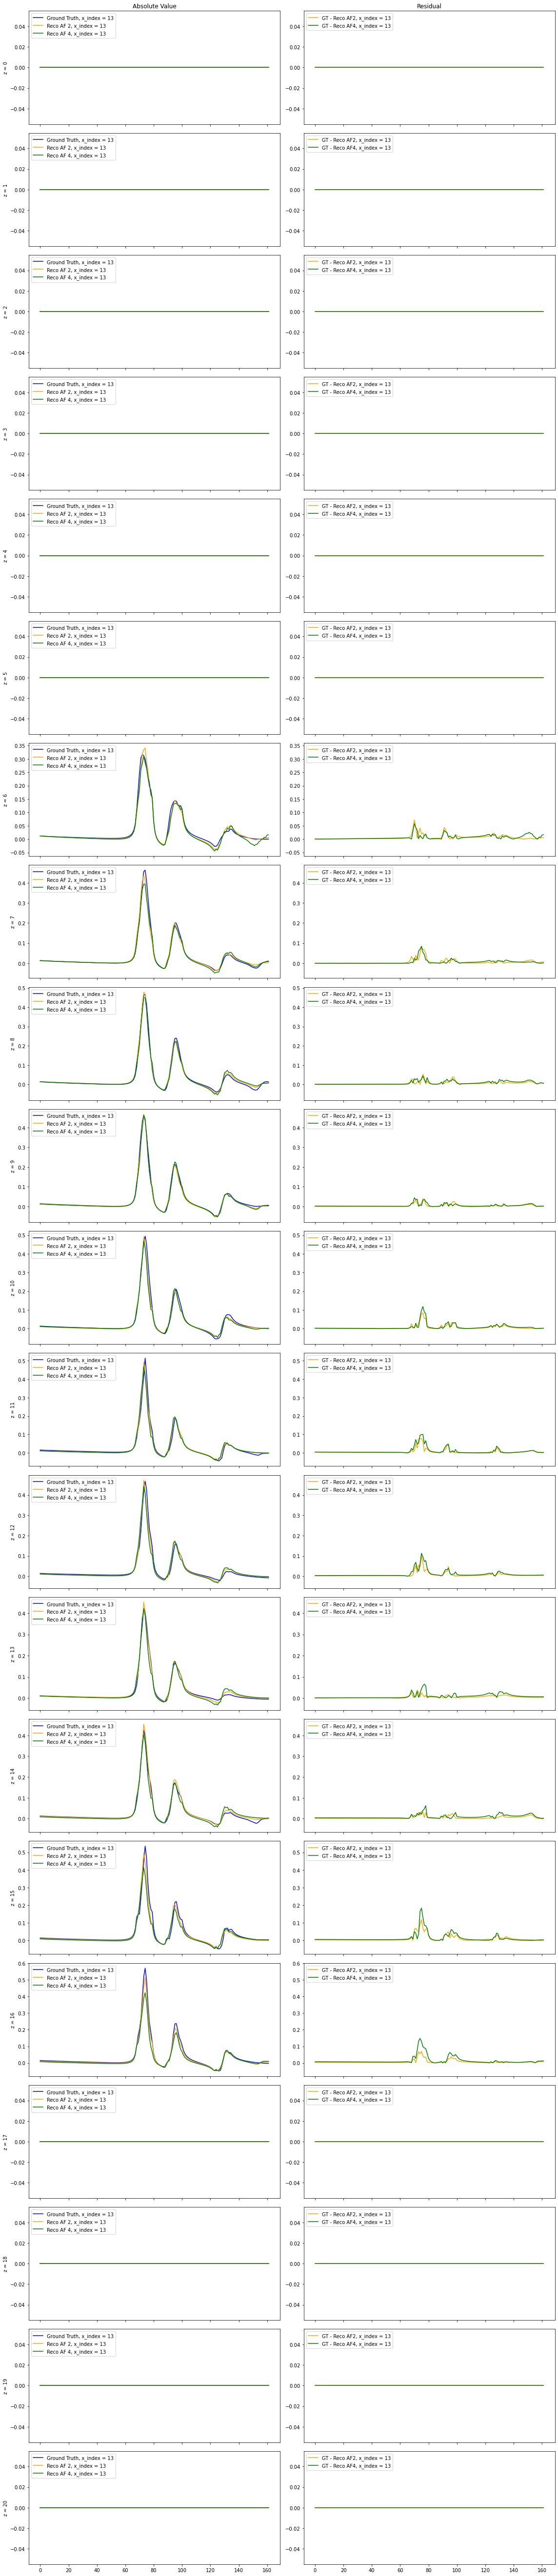

===================Next x index===========================


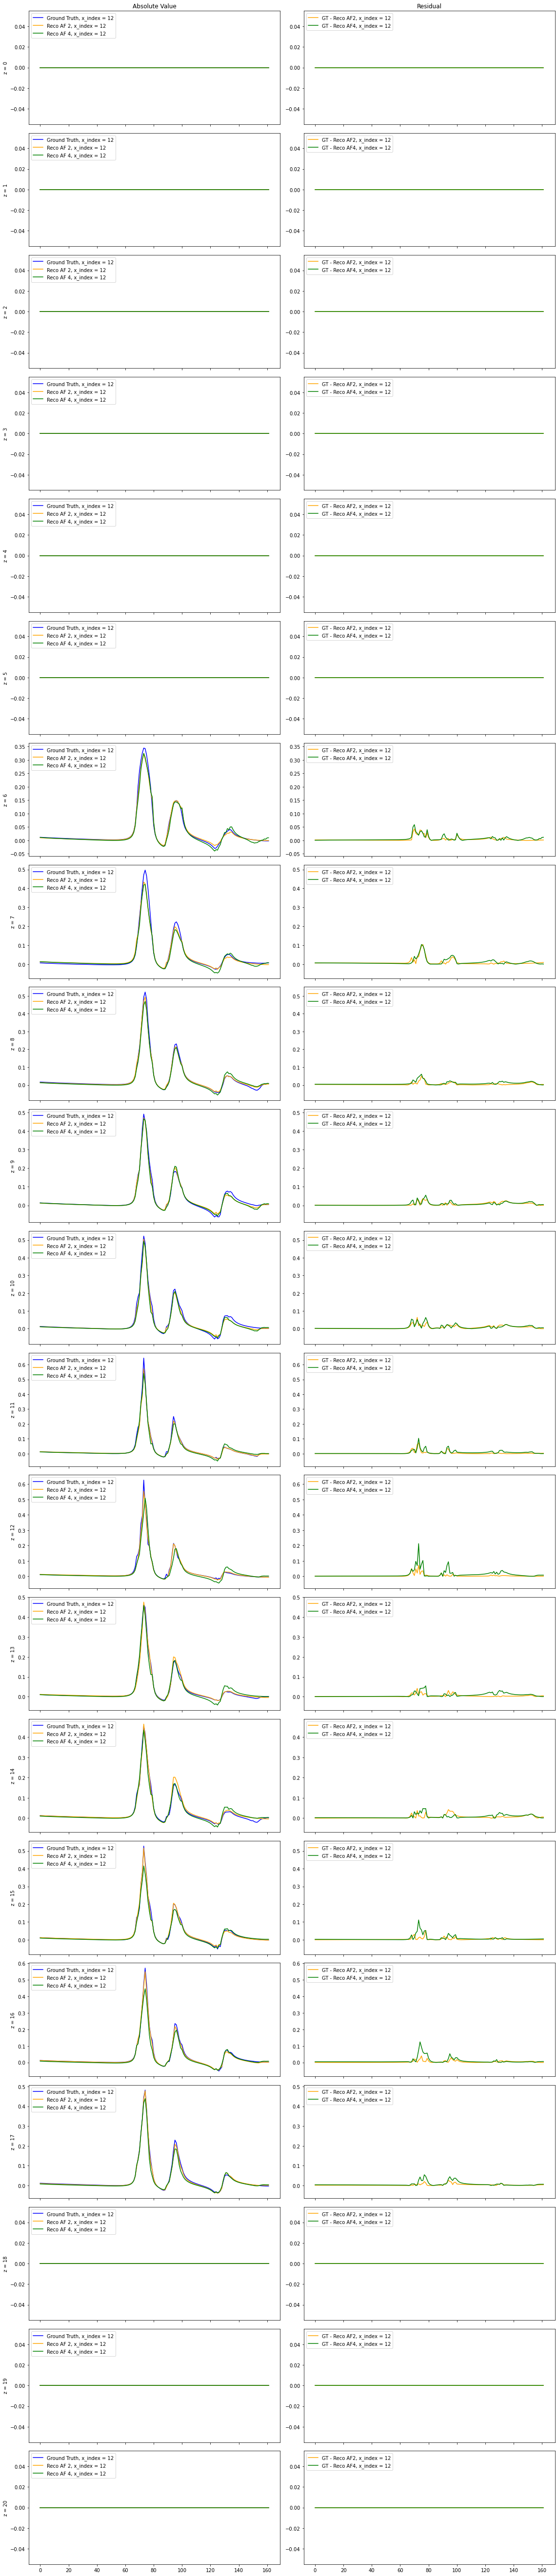

===================Next x index===========================


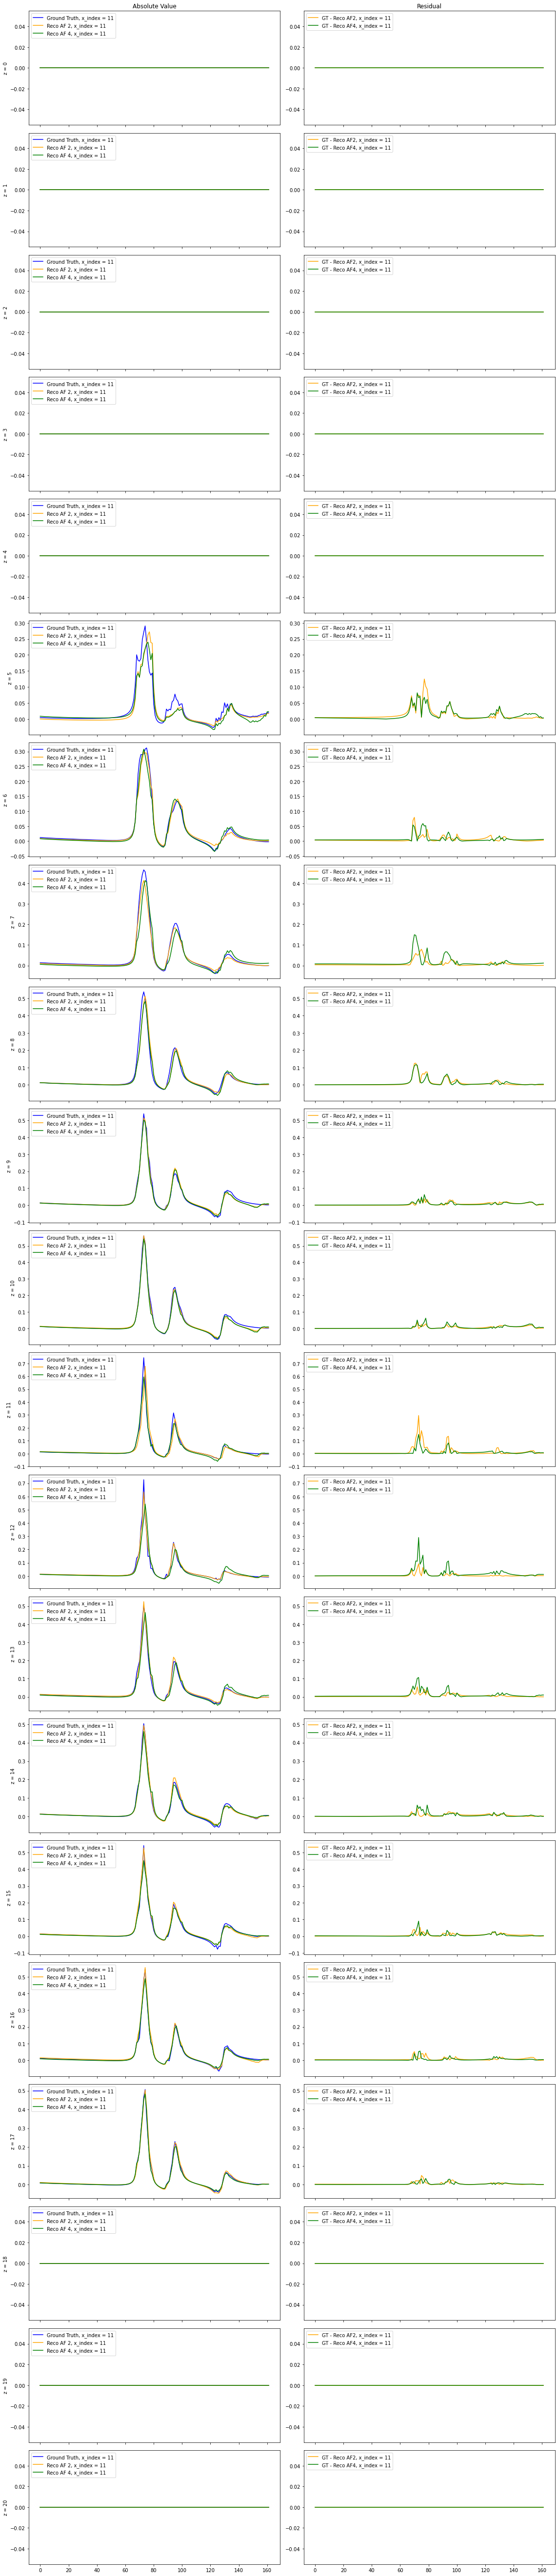

===================Next x index===========================


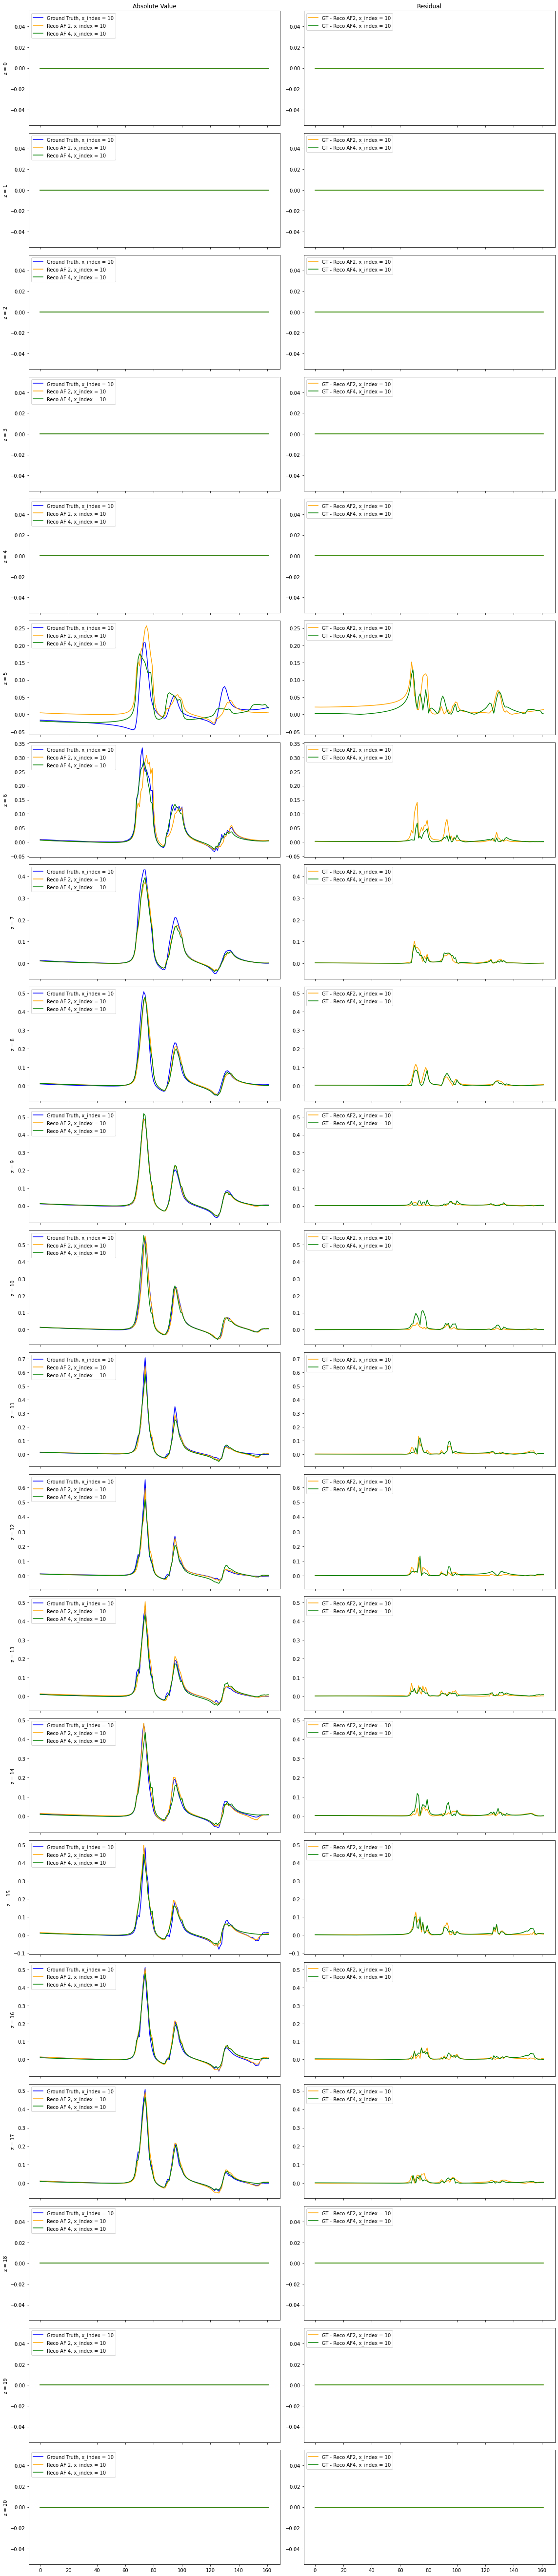

===================Next x index===========================


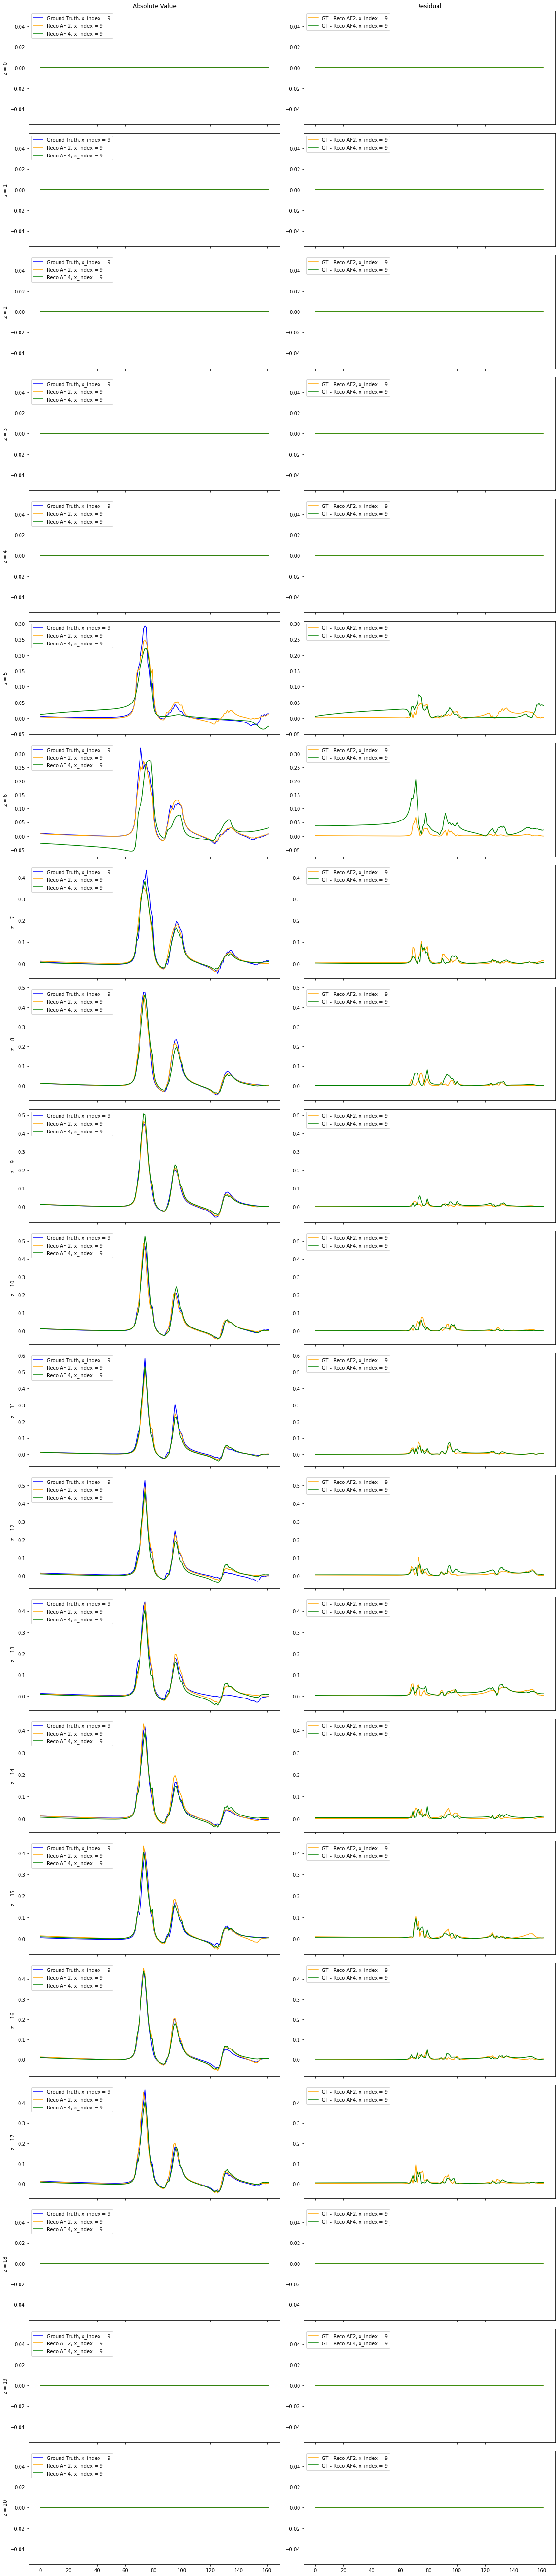

===================Next x index===========================


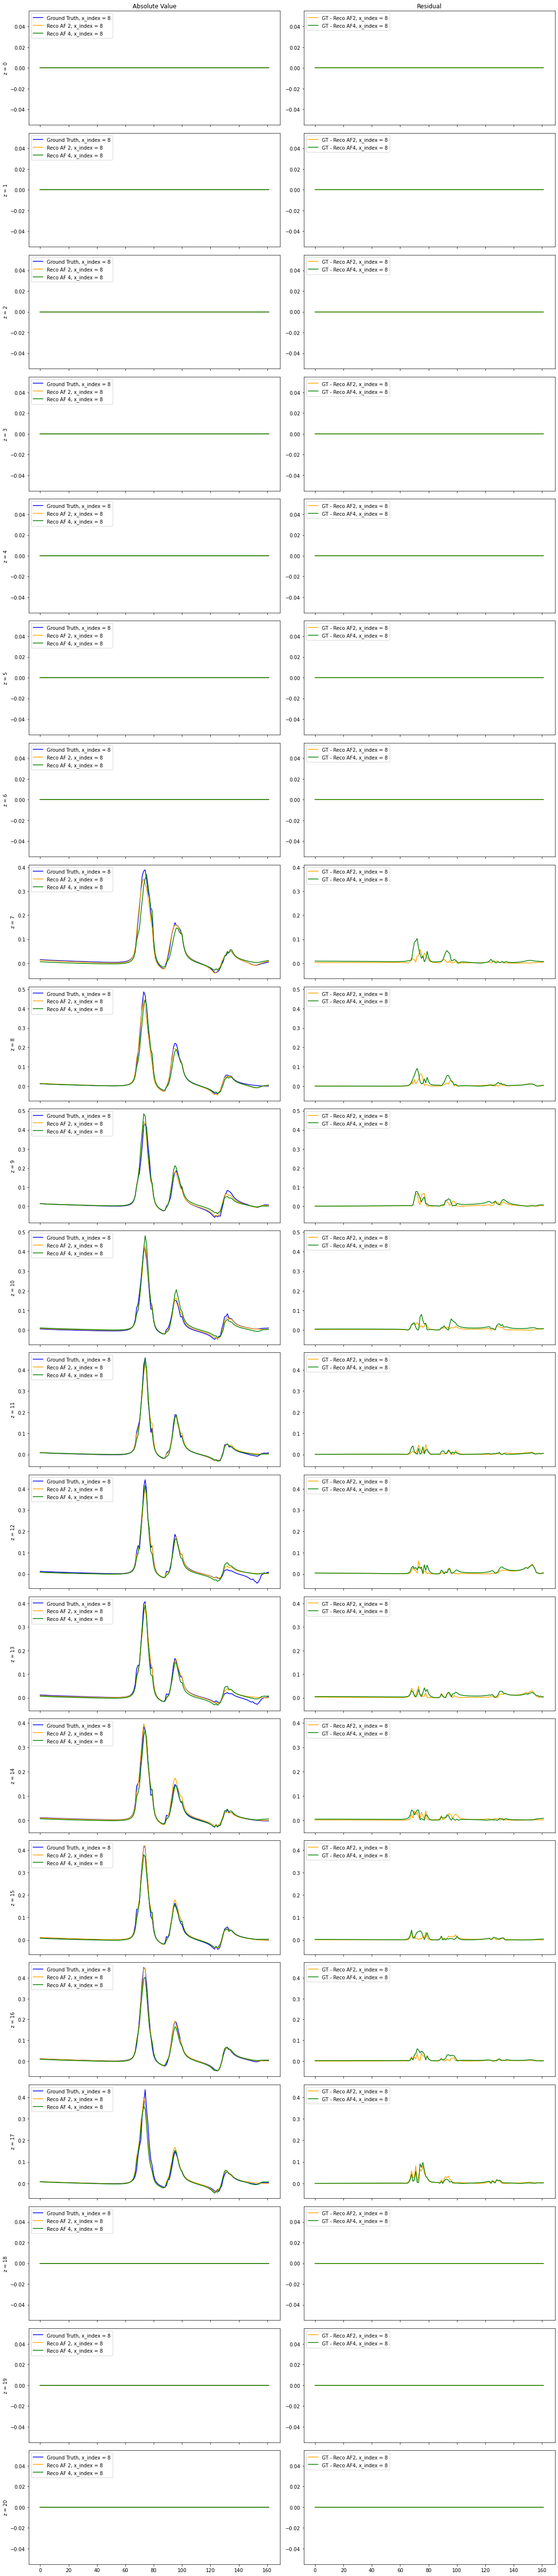

===================Next x index===========================


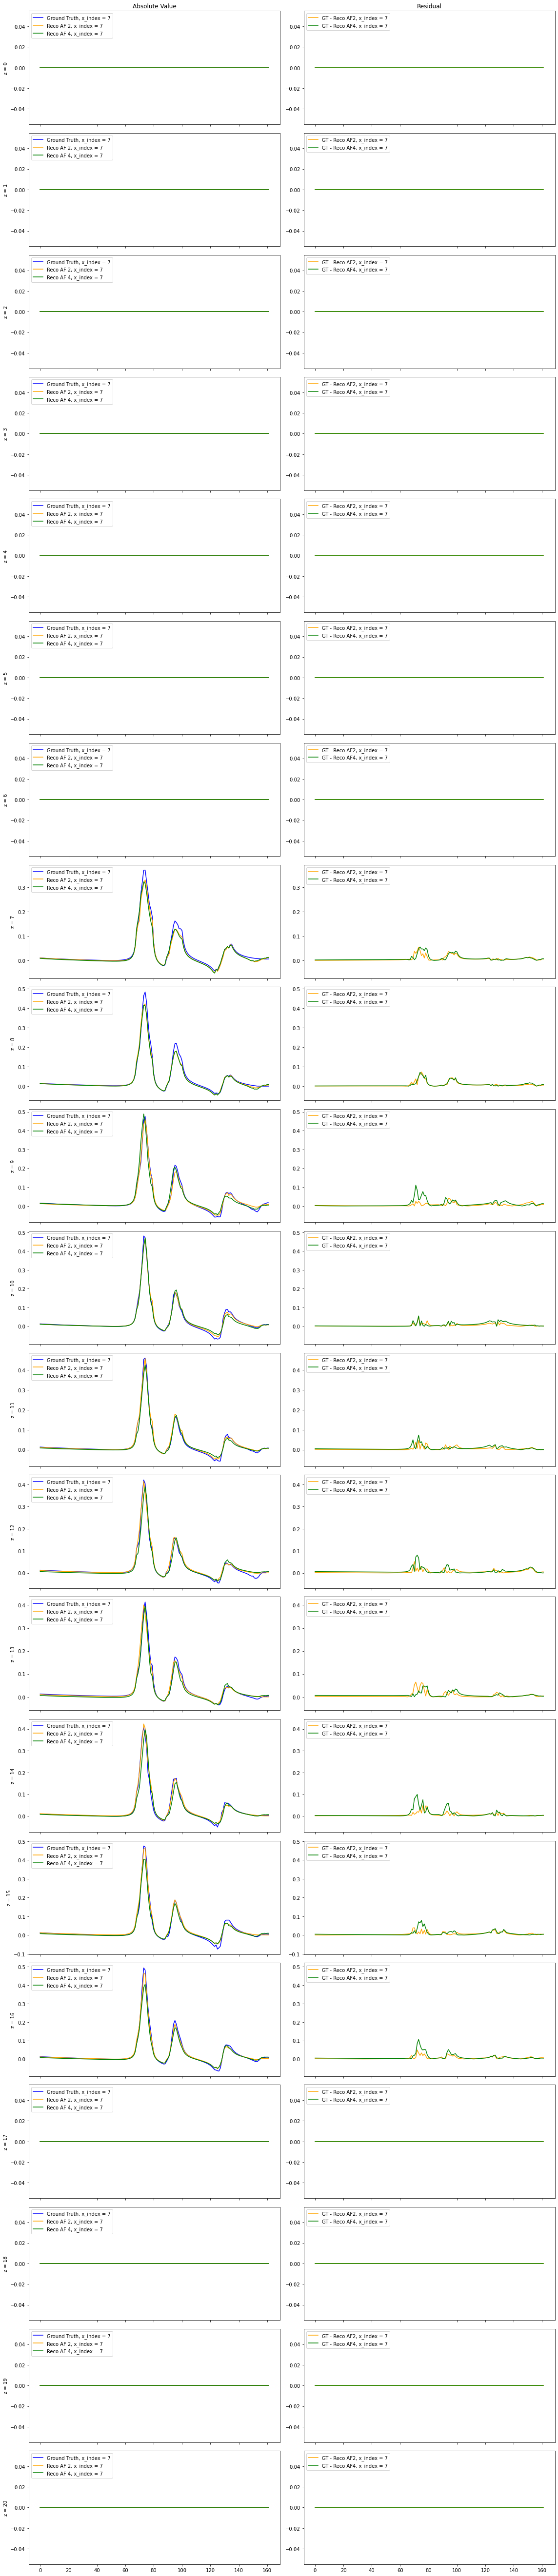

===================Next x index===========================


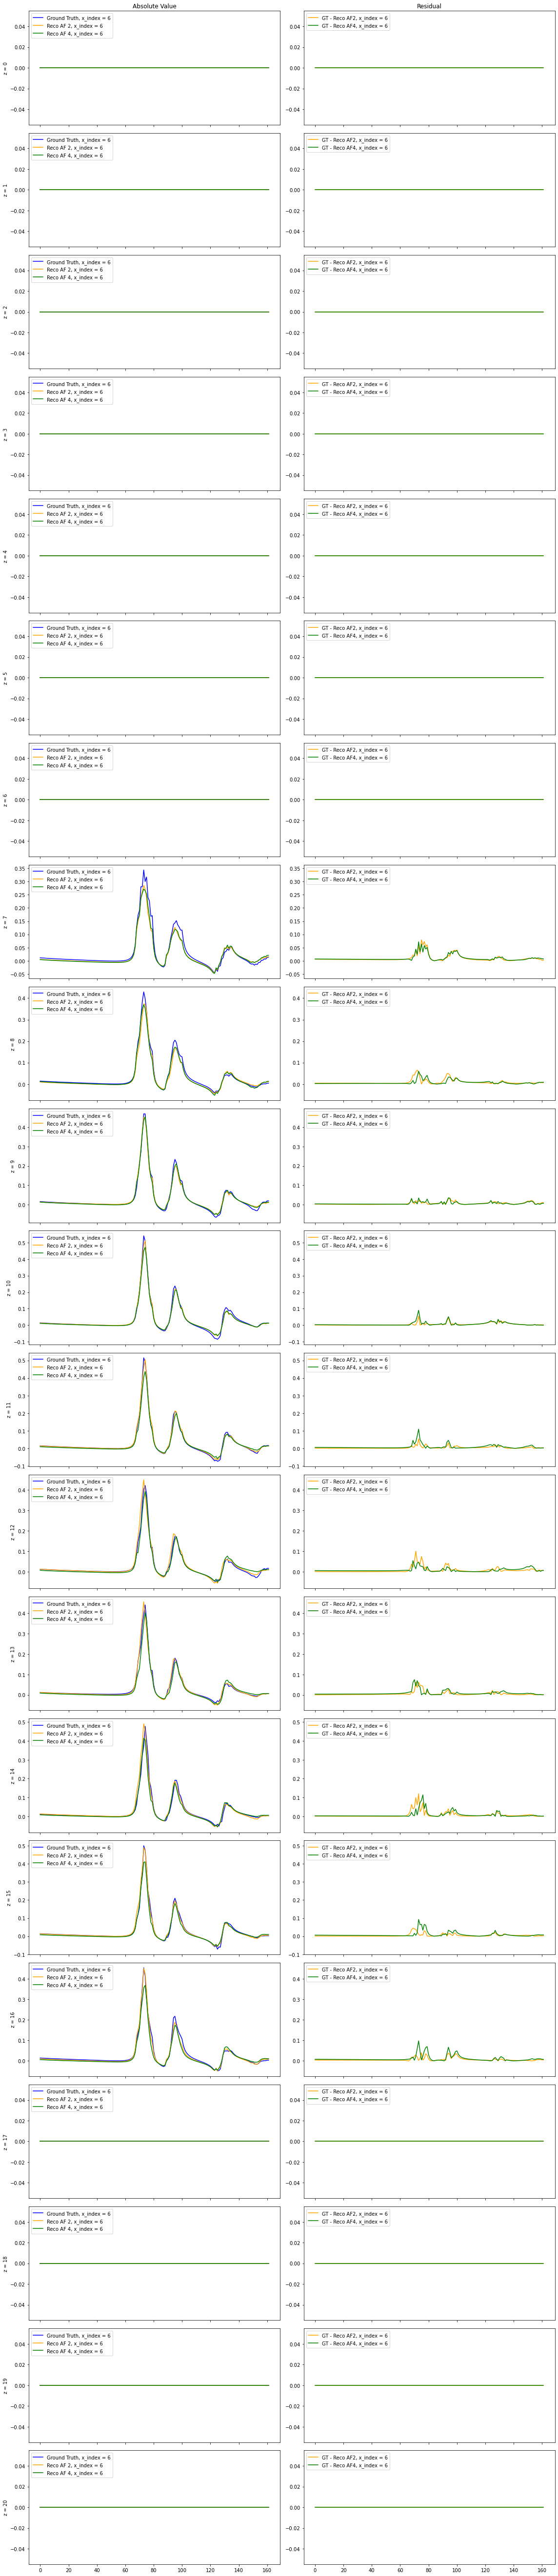

===================Next x index===========================


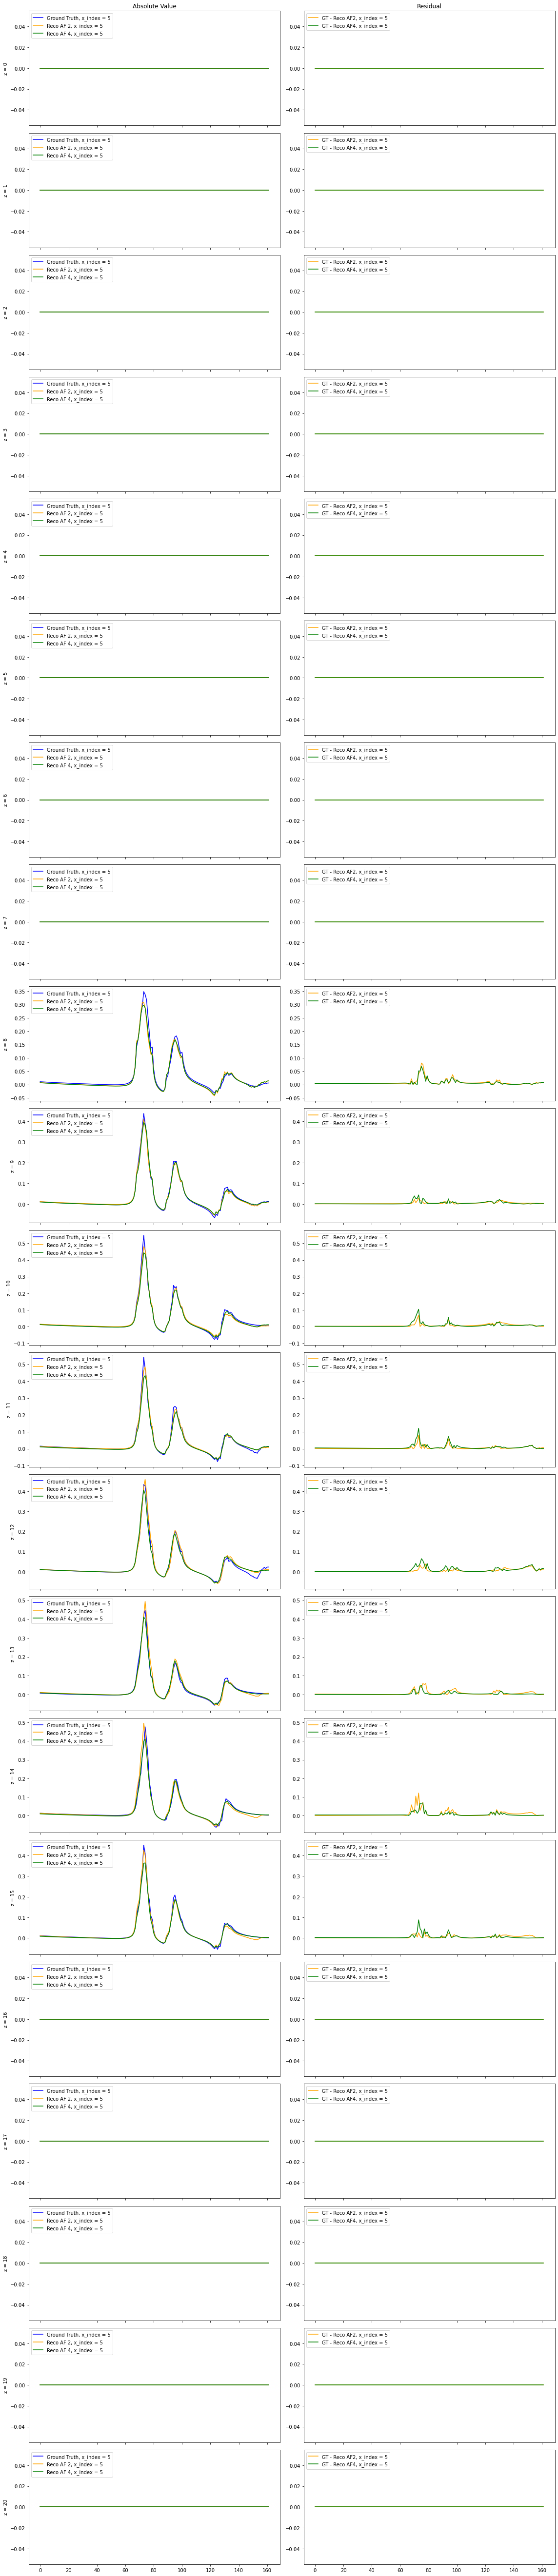

===================Next x index===========================


In [4]:
import numpy as np
import matplotlib.pyplot as plt


Model_Outputs_Test_Set = np.load('FIT_AF2.npy')
model_input             = np.load('FIT_AF4.npy')
ground_truth            = np.load('FIT_GT.npy')


ground_truth_spectral = ground_truth
model_pred_spectral   = Model_Outputs_Test_Set
IFF_LR_8              = model_input

# Fixed indices for x, y, and T:
for x_fixed in range(14, 4, -1):
    y_fixed = 10
    T_fixed = 7
    num_z = 21  # Number of z slices

    # Create a figure with 2 columns:
    #   Column 1 -> Absolute value plots
    #   Column 2 -> Residuals (GT - [Others])
    fig, axes = plt.subplots(nrows=num_z, ncols=2, figsize=(16, num_z * 3.5), sharex=True)
    
    # Ensure axes is a 2D array (for the case of a single row)
    if num_z == 1:
        axes = np.array([axes])
    
    for z in range(num_z):
        # Extract the spectra at [x_fixed, y_fixed, z, :, T_fixed]
        gt_spec  = ground_truth_spectral[x_fixed, y_fixed, z, :, T_fixed]
        mp_spec  = model_pred_spectral[x_fixed, y_fixed, z, :, T_fixed]
        iff_spec = IFF_LR_8[x_fixed, y_fixed, z, :, T_fixed]
        
        # Column 1: Plot absolute spectra
        ax_abs = axes[z, 0]
        ax_abs.plot(gt_spec,  label=f'Ground Truth, x_index = {x_fixed}', color='blue')
        ax_abs.plot(mp_spec,  label=f'Reco AF 2, x_index = {x_fixed}',     color='orange')
        ax_abs.plot(iff_spec, label=f'Reco AF 4, x_index = {x_fixed}',     color='green')
        ax_abs.set_ylabel(f'z = {z}')
        if z == 0:
            ax_abs.set_title('Absolute Value')
        ax_abs.legend(loc='upper left')
        
        # Get the y-axis limits from the absolute value plot
        current_ylim = ax_abs.get_ylim()

        # Column 2: Plot residuals (Ground Truth - [Others])
        ax_res = axes[z, 1]
        residual_gt_mp  = np.abs(gt_spec - mp_spec)
        residual_gt_iff = np.abs(gt_spec - iff_spec)
        ax_res.plot(residual_gt_mp,  label=f'GT - Reco AF2, x_index = {x_fixed}', color='orange')
        ax_res.plot(residual_gt_iff, label=f'GT - Reco AF4, x_index = {x_fixed}', color='green')
        if z == 0:
            ax_res.set_title('Residual')
        ax_res.legend(loc='upper left')
        
        # Apply the same y-axis scale as the absolute plot
        ax_res.set_ylim(current_ylim)
        
    plt.tight_layout()
    plt.show()
    print('===================Next x index===========================')
